## Observations and Insights 

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_merge = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID','Mouse ID'])

# Display the data table for preview
data_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [111]:
# Checking the number of mice.
len(data_merge['Mouse ID'].unique())

249

In [112]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

duplciate = data_merge[data_merge.duplicated(['Mouse ID','Timepoint'])]
duplciate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [113]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = data_merge.drop(data_merge[data_merge['Mouse ID'] == 'g989'].index)
new_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [114]:
# Checking the number of mice in the clean DataFrame.
len(new_data['Mouse ID'].unique())

248

## Summary Statistics

In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
mean = new_data.groupby('Drug Regimen').mean()['Tumour Volume (mm3)']
median =  new_data.groupby('Drug Regimen').median()['Tumour Volume (mm3)']
var = new_data.groupby('Drug Regimen').var()['Tumour Volume (mm3)']
std_var = new_data.groupby('Drug Regimen').std()['Tumour Volume (mm3)']
sem = std_var = new_data.groupby('Drug Regimen').sem()['Tumour Volume (mm3)']



In [116]:
summary = pd.DataFrame({"Mean": mean,'Median': median,'Variance' : var, 'Standard Deviation' : std_var, 'SEM' : sem})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111,0.573111


In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary2 = new_data.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])['Tumour Volume (mm3)']
summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


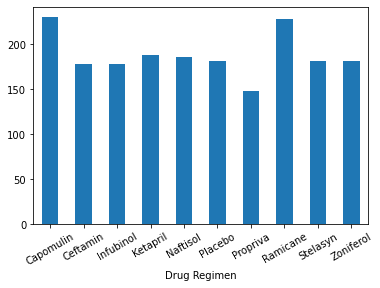

In [118]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
new_data.groupby('Drug Regimen').count()['Timepoint'].plot.bar (x='Drug Regimen', y='Timepoint', rot = 30)


In [129]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [120]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [123]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [124]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [125]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [126]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [127]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
